## Conclusions Are at the End of the Notebook

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_excel('ZF_Elec_Responses.xlsx')

### Getiing an idea on how the dataset is structured

In [3]:
# take a look at the data
df.head()

,Timestamp,Full Name (3 names at least),Phone Number,Email,Faculty - Department,Academic Year,Date of birth,Facebook URL,LinkedIn URL (optional),What do you know about Z Fast Racing Team?,How did you hear about us?,Do you have any volunteering experience?,"If yes, what is your volunteering experience?",What do you know about electrical vehicle ?,What do you know about competition we participate ?,What do you seek to learn by joining Z Fast Team?,Any questions?
0,2022-05-12 19:30:19.458,Mohamed Monir Mohamed,01210933802,mohameddobea13@gmail.com,Electrical engineering,3rd year,2000-11-11,https://www.facebook.com/Mohamed.Monir0,https://www.linkedin.com/in/mohamed-dobea-a911...,Z-Fast is the team that represents to Zagazig ...,Facebook,Yes,I have volunteered with AIESEC SOLVAKIAN organ...,It is an automotive vehicle that uses one or m...,EVER is giving young engineer the opportunity ...,I would like to improve my skills in embedded ...,NaN
1,2022-05-12 20:01:06.995,Mohammed Salah Aboshosha,01027463950,mohamedaboshosha12@gmail.com,Engineering - Electrical,2nd year,2001-10-27,https://www.facebook.com/Mohammedsalah.hasona,https://www.linkedin.com/in/mohammed-salah-hasona,Z Fast is a racing team which represents Zagaz...,"Facebook, Friends",Yes,Joined zag eng family for about one and half y...,To sum up electrical vehicles are vehicles tha...,EVER competition as Z Fast got the best Innova...,Learning more about embedded systems and elect...,No thanks
2,2022-05-12 20:15:51.354,mohamed salah fathy abdelhamid,01004257855,medosalahmedo4@gmail.com,engengineering-mechatronics,3rd year,2000-11-17,https://www.facebook.com/medo.salah210/,NaN,its a team represents Zagazig University in El...,"Facebook, Friends",No,this will be first time,An electric vehicle (EV) is one that uses an e...,i know that you make an electrical vehicle tha...,I am seeking to develop my skills in embedded ...,thanks
3,2022-05-12 20:17:26.297,Omar Saad Mohamed Saad Soliman,01149493914,mingosos13@gmail.com,Mechatronics,3rd year,2001-01-27,https://www.facebook.com/omar.saad.3726,https://www.linkedin.com/in/omar-soliman-a4198...,A team that makes an electric car and enter co...,"Facebook, Friends, Faculty colleagues",No,no thing,They are new vehicle that run on electric batt...,no thing,New skills in communication and working by my ...,no
4,2022-05-12 20:30:14.318,ماجد علاء السيد محمد,01013414668,Magedalaazsc@gmail.com,كلية الهندسة - أولى كهربا,2nd year,2002-02-24,https://www.facebook.com/maged.alaa.315,NaN,تيم طموح بيعمل حاجة عندي الشغف اتعلمها واطلع ط...,"Facebook, Friends",Yes,Zag Eng team ( for 6 months - now)\nResala cha...,صديقة للبيئة وموفرة وهي حاجة جديد ففيها مجال ل...,اسمها EVER تقريبا وخاصة بتصميم وتشغيل سيارات ا...,اتعلم اردوينو مهم بالنسبالي جدا وكمان جزء ال E...,Thanks


In [4]:
df.shape

(90, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Timestamp                                            90 non-null     datetime64[ns]
 1   Full Name (3 names at least)                         90 non-null     object        
 2   Phone Number                                         90 non-null     object        
 3   Email                                                90 non-null     object        
 4   Faculty - Department                                 90 non-null     object        
 5   Academic Year                                        90 non-null     object        
 6   Date of birth                                        90 non-null     datetime64[ns]
 7   Facebook URL                                         90 non-null     object        
 8   Li

In [6]:
# Checking for NaNs
df.isna().sum()

Timestamp                                               0
Full Name (3 names at least)                            0
Phone Number                                            0
Email                                                   0
Faculty - Department                                    0
Academic Year                                           0
Date of birth                                           0
Facebook URL                                            0
LinkedIn URL (optional)                                32
What do you know about Z Fast Racing Team?              0
How did you hear about us?                              0
Do you have any volunteering experience?                0
If yes, what is your volunteering experience?           0
What do you know about electrical vehicle ?             7
What do you know about competition we participate ?    17
What do you seek to learn by joining Z Fast Team?       0
Any questions?                                         39
dtype: int64

In [7]:
# Checking for duplicates
sum(df.duplicated())

0

In [8]:
# Drop uneccessary columns with many NAN values
df.drop(columns = {'LinkedIn URL (optional)', 'Any questions?'}, inplace = True)
# Drop columns that won't affect our analysis
df.drop(columns = {'Phone Number', 'Email', 'Facebook URL'}, inplace = True)

### Renaming Columns so it is easier to deal with while coding

In [9]:
df.rename(columns = {'What do you know about Z Fast Racing Team?' : 'know_z', 'How did you hear about us?' : 'did_hear', 
                     'Do you have any volunteering experience?' : 'volun_exper', 'If yes, what is your volunteering experience?' : 'extra_volun_exper',
                    'What do you know about electrical vehicle ?' : 'know_elec_veh', 'What do you know about competition we participate ?' : 'know_compet',
                    'What do you seek to learn by joining Z Fast Team?' : 'seek_to_learn'}, inplace = True)

In [10]:
df.rename(columns = {'Full Name (3 names at least)' : 'Full Name'}, inplace = True)

In [11]:
df.rename(columns = lambda x : x.strip().lower(), inplace = True)

In [12]:
df.head(2)

,timestamp,full name,faculty - department,academic year,date of birth,know_z,did_hear,volun_exper,extra_volun_exper,know_elec_veh,know_compet,seek_to_learn
0,2022-05-12 19:30:19.458,Mohamed Monir Mohamed,Electrical engineering,3rd year,2000-11-11,Z-Fast is the team that represents to Zagazig ...,Facebook,Yes,I have volunteered with AIESEC SOLVAKIAN organ...,It is an automotive vehicle that uses one or m...,EVER is giving young engineer the opportunity ...,I would like to improve my skills in embedded ...
1,2022-05-12 20:01:06.995,Mohammed Salah Aboshosha,Engineering - Electrical,2nd year,2001-10-27,Z Fast is a racing team which represents Zagaz...,"Facebook, Friends",Yes,Joined zag eng family for about one and half y...,To sum up electrical vehicles are vehicles tha...,EVER competition as Z Fast got the best Innova...,Learning more about embedded systems and elect...


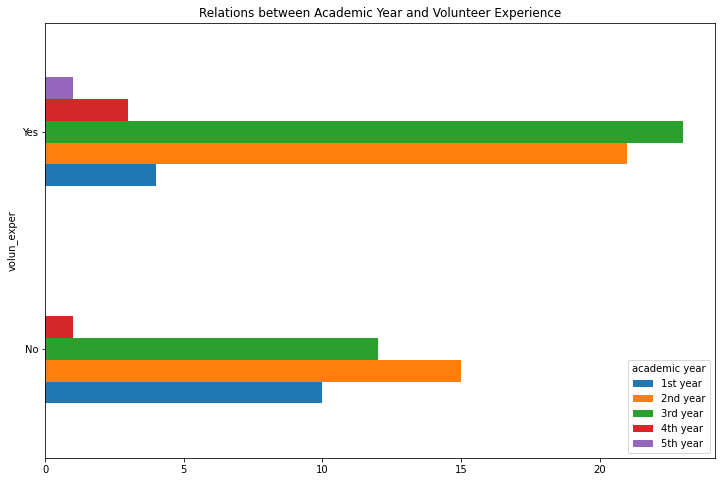

In [13]:
df.groupby(['volun_exper'])['academic year'].value_counts().unstack().plot(kind = 'barh',
                                                                           title = 'Relations between Academic Year and Volunteer Experience', 
                                                                           figsize = (12, 8));

In [14]:
# Fill out NaNs 
df.fillna('No Prior Knowledge', inplace = True)

In [15]:
# Filter people that didn't provide any knowlwdge regarding electrical vehicles
no_elec_veh_knowledge = df[df['know_elec_veh'] == 'No Prior Knowledge']
no_elec_veh_knowledge

,timestamp,full name,faculty - department,academic year,date of birth,know_z,did_hear,volun_exper,extra_volun_exper,know_elec_veh,know_compet,seek_to_learn
41,2022-05-14 22:20:48.384,Alaa Emad Abdelhamid Wahba,Electrical Engineering,3rd year,2001-08-07,A team of ambitious students who participate i...,Faculty colleagues,Yes,"Member at RES team, zigzag club.",No Prior Knowledge,No Prior Knowledge,Embedded systems
52,2022-05-16 16:12:21.662,محمد عصمت عبدالله,engineering-electrics,2nd year,2002-09-28,تيم بيعمل عربيات كهرباء وبيخش مسابقات وبيطلع...,Facebook,Yes,مشارك في اتح الطلبة,No Prior Knowledge,No Prior Knowledge,تمرش علي الشغل العملي لقسم كهرباء
62,2022-05-17 10:09:18.156,Ahmed Mohamed Fathy abdelhameed,Electric engineering,2nd year,2002-01-12,Z-Fast is the team that represents Zagazig Uni...,Facebook,No,.,No Prior Knowledge,EVER Egypt is a competition for design and man...,l want to have a new experience in electric ca...
65,2022-05-17 21:17:36.493,Norhan mohsen soliman,Faculty of enginering /mechanical,2nd year,2001-12-19,Volunteering team,"Facebook, Friends",Yes,Helping people who’s needing help,No Prior Knowledge,No Prior Knowledge,Any theng can help me in labor market
67,2022-05-17 23:01:30.759,Ahmed shady elsayed,هندسه الزقازيق قسم ميكاترونكس lvl000,1st year,2003-05-20,Electric cars,Friends,No,I have some experience but it's little,No Prior Knowledge,No Prior Knowledge,معرفه اليه عمل السيارات الكهربائية والمشاركه ف...
68,2022-05-18 12:54:26.201,Ahmed yousry mohamed eldidamony,Faculty Of Engineering _ Electrical Department,1st year,2002-08-18,Nothing,Facebook,No,No,No Prior Knowledge,No Prior Knowledge,Embedded systems
83,2022-05-24 18:40:44.285,Mohamed Salah Eid,Electrical Engineering,4th year,2000-08-01,فريق طلابي بكلية الهندسة جامعه الزقازيق يهتم ب...,"Facebook, Friends",Yes,ZigZag Club\nجمعية صناع الحياة,No Prior Knowledge,No Prior Knowledge,Learning more about Electrical Vehicle\nLearni...


In [16]:
# Filter people that didn't provide any knowlwdge regarding the "COMPETITION"
no_competition_knowledge = df[df['know_compet'] == 'No Prior Knowledge']
no_competition_knowledge

,timestamp,full name,faculty - department,academic year,date of birth,know_z,did_hear,volun_exper,extra_volun_exper,know_elec_veh,know_compet,seek_to_learn
5,2022-05-12 20:32:38.364,Mostafa Mohamed Ahmed,Faculty of Engineering ZU- Electrical Department,2nd year,2002-01-01,A team interested in electrical cars,Facebook,Yes,PR at Zegzag,Electric vehicles have low running costs as th...,No Prior Knowledge,Every thing.
11,2022-05-12 21:37:44.338,محمد ايمن محمد,Engineering - Electrical,2nd year,2002-08-14,تيم صناعة السيارات الكهربائية,"Facebook, Friends",No,I don't have any volunteering experience,هي سيارات تسير ب الكهرباء عن طريقة برمجة المكو...,No Prior Knowledge,اتعلم اي حاجة افيد بيها غيري 🤍
14,2022-05-12 22:03:32.238,محمد جمال سليم,Engineering-Electrical,2nd year,2002-04-01,تيم صناعة السيارات الكهربية,"Facebook, Friends",No,I don't have any volunteering experience,سيارات تسير يالكهرباء عن طريق البرمجه وامدادها...,No Prior Knowledge,اى حاجه افيد بيها غيرى
18,2022-05-12 22:47:06.332,احمد عبد المجيد محمد محمد منصور,Prep,1st year,2003-01-04,تيم تابع لهندسة الزقازيق بيشارك في مسابقات عال...,"Facebook, Friends",No,No,It is a vehicle which run with ele,No Prior Knowledge,To improve my soft skills and gain more experi...
26,2022-05-13 09:25:57.114,Abdelkader Ahmed Ismail Mohamed,Air defence college/communication and electronics,5th year,1991-04-04,I don't know anything,Facebook,Yes,Electronics,Difficult battery,No Prior Knowledge,Design custom components
34,2022-05-14 00:25:12.934,Mohamed saber mohamed elsadek,Engineering/Electrical department,3rd year,2001-10-15,تيم بيشتغل علي ال electrical car وبيدخل بيها م...,Friends,Yes,Zageng family & IEEE ZSB,عربيات بتشتغل بالبطاريات وبتتكون من كذا حاجة ز...,No Prior Knowledge,عايز اتعلم نظام ال electrical car كله ك electr...
41,2022-05-14 22:20:48.384,Alaa Emad Abdelhamid Wahba,Electrical Engineering,3rd year,2001-08-07,A team of ambitious students who participate i...,Faculty colleagues,Yes,"Member at RES team, zigzag club.",No Prior Knowledge,No Prior Knowledge,Embedded systems
47,2022-05-15 20:31:50.301,احمد ناصر محمد,الهندسة الكهربية,2nd year,2002-09-30,فريق يمثل جامعة الزقازيق لتصميم السيارات الكهربية,Facebook,No,No,هي مركبة تسير بمحرك كهربائي \nتعمل بالطاقة الت...,No Prior Knowledge,اتعلم اكتر
48,2022-05-15 23:08:16.103,ali mahmoud moharm,electrical engineer,2nd year,2002-03-15,معلومات صغيره خالص بس عاوز اعرف كل حاجه عنها ا...,Facebook,Yes,"انا في IEEEفي لجنه markting , ولجنه pes",انها احسن بكتيرم =ن العربيات العديه ومش ملوثه ...,No Prior Knowledge,اكيد اسعي ل اني اكون عضو واقدر استفاد كتير منك...
51,2022-05-16 12:58:09.910,على ياسر النادى,هندسه الزقازيق/ميكاترونكس,2nd year,2002-08-13,تيم تطوعي بيشتغل ع سياره كهربائيه و بيطورها و ...,"Facebook, Friends",Yes,ديه هتكون اول مره ادخل ف تيم تطوعي ليه علاقه ب...,السيارات الكهربائية تعمل بالكهرباء بشكل كلي أو...,No Prior Knowledge,التعرف ع اصدقاء و تنميه التواصل من خلال العمل...


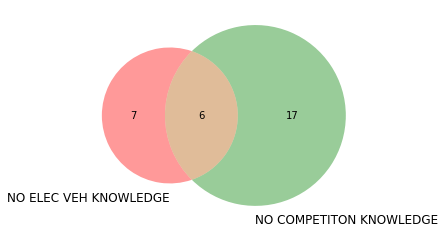

In [17]:
# Obtain names of people who didn't have any prior knowledge in both aspects
from matplotlib_venn import venn2
a = no_elec_veh_knowledge.shape[0]
b = no_competition_knowledge.shape[0]

set1 = set(list(no_elec_veh_knowledge['full name']))
set2 = set(list(no_competition_knowledge['full name']))
no_prior_know = list(set1.intersection(set2))

venn2(subsets = (a, b, len(no_prior_know)), set_labels = ('NO ELEC VEH KNOWLEDGE', 'NO COMPETITON KNOWLEDGE'))
plt.show()

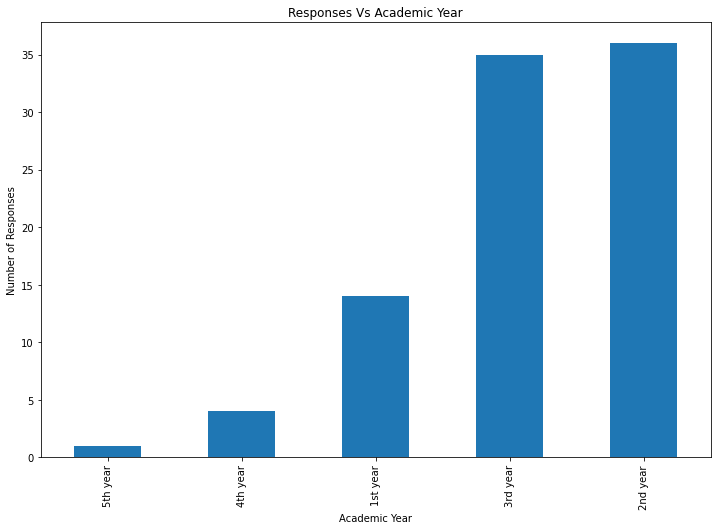

In [18]:
df['academic year'].value_counts(sort = True, ascending = True).plot(kind = 'bar', 
                                                                     title = 'Responses Vs Academic Year', 
                                                                     xlabel = 'Academic Year',
                                                                     ylabel = 'Number of Responses',
                                                                     figsize = (12, 8));

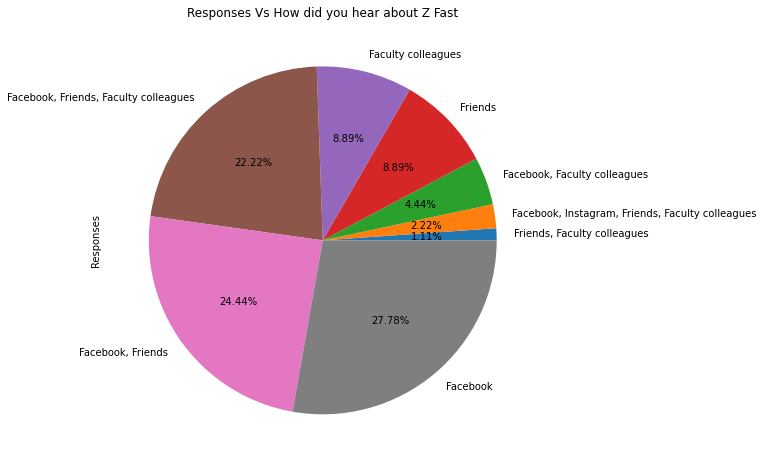

In [19]:
df.did_hear.value_counts(sort = True, ascending = True).plot(kind = 'pie',
                                                                     autopct = '%1.2f%%',
                                                                     title = 'Responses Vs How did you hear about Z Fast',
                                                                     ylabel = 'Responses',
                                                                     figsize = (12, 8));

## Conclusions:-

#### A) 32 people didn't provide a LinkedIn profile.

#### B) People who are older, in their 3rd Year & 4th Year, have a prior volunteer experience.

#### C) 7 people didn't provide any prior knowledge regarding electrical vehicles, and 17 didn't provide any prior knowledge about the Z Fast Competition.

#### D) 6 people didn't provide in both aspects and are most likely NOT to be chosen for Z Fast Team and they are:-
> Ahmed yousry mohamed eldidamony
>
> محمد عصمت عبدالله 
>
> Ahmed shady elsayed
>
> Norhan mohsen soliman
>
> Alaa Emad Abdelhamid Wahba
>
> Mohamed Salah Eid

#### E) With respect to academic year, the most responses came from 2nd Year & 3rd Year students.

#### F) Most of the students who filled the application for the Z Fast Team became aware of the application because of:
> Facebook
>
> Friends & College Colleages